# Analyzing Climate Change from '50s to '00s

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
data = pd.read_csv("climate_change.csv", parse_dates=["date"])
data.head()

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06


In [3]:
# Quick look at numeric variables
data.describe()

,co2,relative_temp
count,699.000000,706.000000
mean,352.316481,0.302309
std,26.160083,0.305417
min,313.200000,-0.360000
25%,328.425000,0.050000
50%,350.110000,0.290000
75%,373.205000,0.550000
max,407.720000,1.350000


In [4]:
# Check for NaN
data.isnull().sum()

date             0
co2              7
relative_temp    0
dtype: int64

In [5]:
# Look at NaN
data[data.co2.isnull()]

,date,co2,relative_temp
3,1958-06-06,NaN,-0.05
7,1958-10-06,NaN,0.04
71,1964-02-06,NaN,-0.12
72,1964-03-06,NaN,-0.22
73,1964-04-06,NaN,-0.30
213,1975-12-06,NaN,-0.17
313,1984-04-06,NaN,0.08


In [6]:
# Drop NaN
data.dropna(inplace=True)
data.isnull().sum()

date             0
co2              0
relative_temp    0
dtype: int64

In [7]:
# Parameters for visualization with Seaborn
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_context("notebook")
sns.set_style("whitegrid")

<AxesSubplot:xlabel='date', ylabel='co2'>

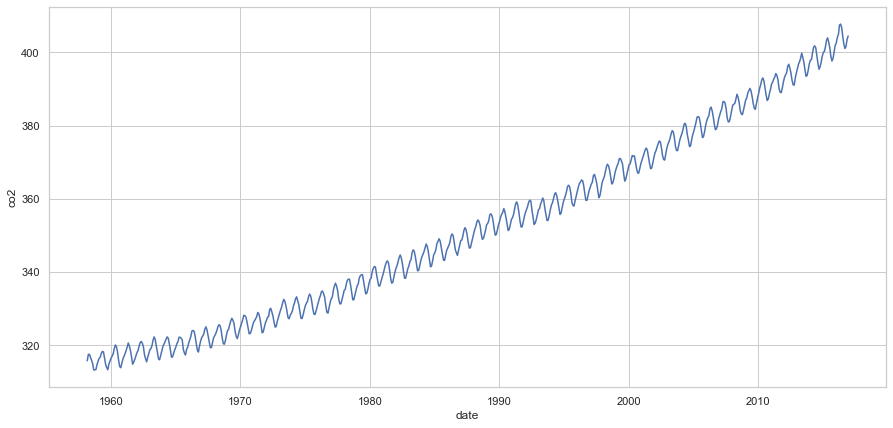

In [8]:
# Plot Co2 over time
sns.lineplot(x="date", y="co2", data=data)

<AxesSubplot:xlabel='date', ylabel='relative_temp'>

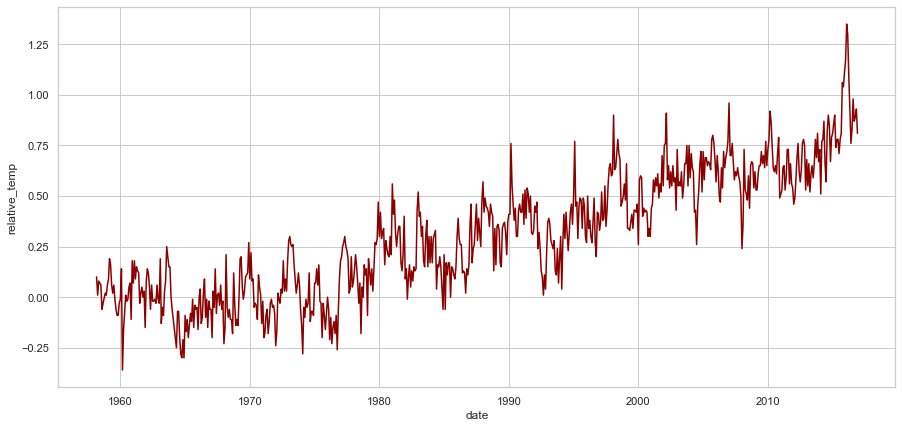

In [9]:
# Plot relative_temp over time
sns.lineplot(x="date", y="relative_temp", data=data, color="darkred")

<AxesSubplot:label='742e73d7-62d0-499a-8dde-0f711f974dbb', xlabel='date', ylabel='relative_temp'>

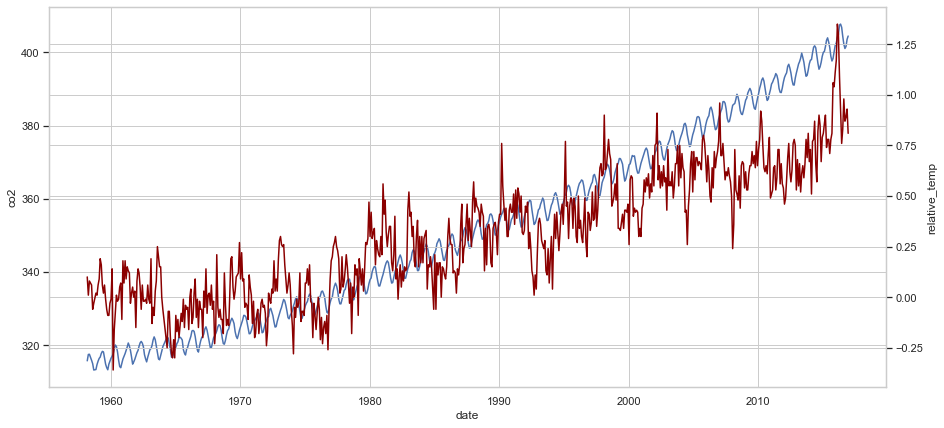

In [10]:
# Overlap the two plots
sns.lineplot(x="date", y="co2", data=data)
ax = plt.twinx()
sns.lineplot(x="date", y="relative_temp", data=data, color="darkred", ax=ax)

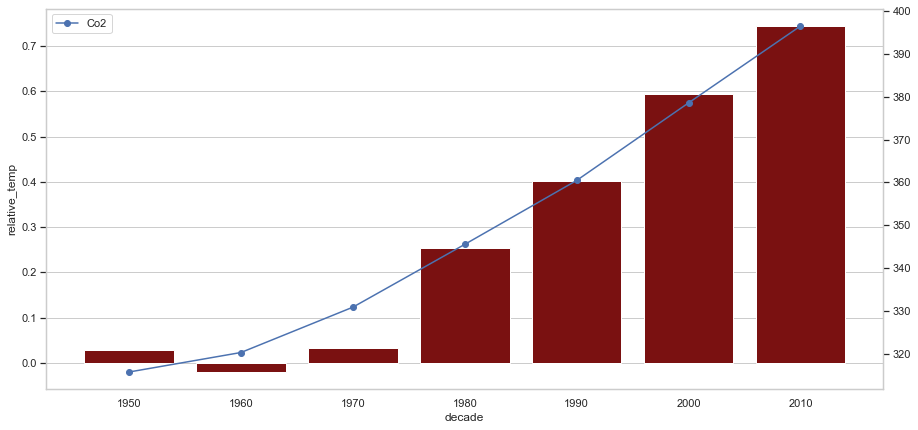

In [11]:
# Create a new column, decade
data["decade"] = (np.floor(data.date.dt.year / 10) * 10).astype(int)

# Group by decade and compute the mean for co2 and relative_temp
grouped = data.groupby("decade", as_index=False)[["relative_temp", "co2"]].mean()

# Plot the results
ax = sns.barplot(x="decade", y="relative_temp", data=grouped, color="darkred")
ax1 = ax.twinx()
ax1.plot(grouped.co2, marker="o")
plt.legend(["Co2"], loc='upper left')
plt.grid(linestyle=":")

<AxesSubplot:xlabel='co2', ylabel='relative_temp'>

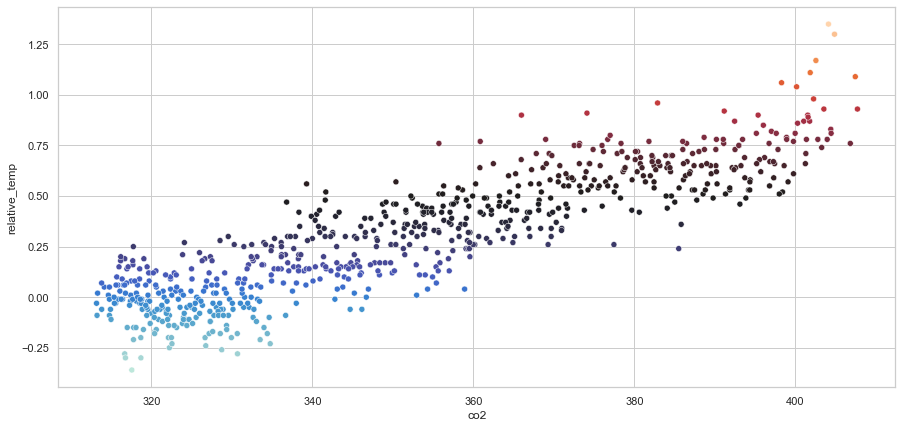

In [12]:
# Plot relative_temp over co2
sns.scatterplot(x="co2", y="relative_temp", data=data, hue="relative_temp", palette="icefire", legend = False)

Text(368.1966817155756, 1, 'Mean Co2 after 70s')

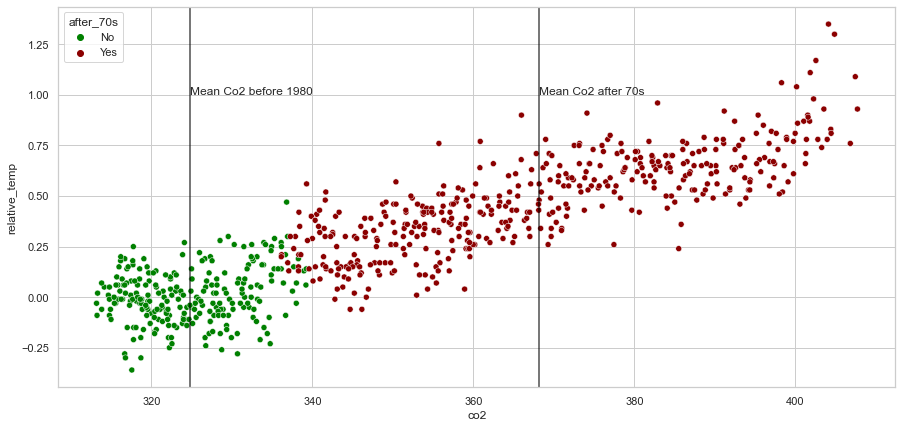

In [13]:
# Create a new column, after_70s
data["after_70s"] = ["Yes" if x > 1970 else "No" for x in data.decade]

# Calculate the mean co2 until 1980 (from 1950 to 1979) and after '70s
mean_co2_until_80 = data.query('after_70s == "No"').co2.mean()
mean_co2_after_70s = data.query('after_70s == "Yes"').co2.mean()

# Plot relative_temp over co2 with hue = after_70s
sns.scatterplot(x="co2", y="relative_temp", data=data, hue="after_70s", palette=["green", "darkred"])

# Draw a vertical line for mean co2 until '80s
plt.axvline(mean_co2_until_80, 0,data.relative_temp.max(),color="black",alpha=0.70)
plt.text(mean_co2_until_80,1,'Mean Co2 before 1980')

# Draw a vertical line for mean co2 after '70s
plt.axvline(mean_co2_after_70s, 0,data.relative_temp.max(),color="black", alpha=0.70)
plt.text(mean_co2_after_70s,1,'Mean Co2 from 1980')